# 1. 패키지 / 데이터 Import

In [1]:
import pandas as pd
import numpy as np
import os
import platform
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
os_env = platform.system()

if os_env == "Linux":
    pj_home = "/".join(os.path.abspath(os.path.dirname(os.path.abspath('__file__'))).split("/")[:-1])
    data_home = pj_home + "/input/data/"
    
elif os_env == "Windows":
    pj_home = "\\".join(os.path.abspath(os.path.dirname(os.path.abspath('__file__'))).split("\\")[:-1])
    data_home = pj_home + "\\input\\data\\"

In [3]:
train = data_home + "train.csv"
test = data_home + "test.csv"

In [4]:
df_train = pd.read_csv(train)

In [5]:
df_train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


# 2. Image 라벨 값 분포 확인 

Text(0.5,0.92,"Label's count distribution in train dataset")

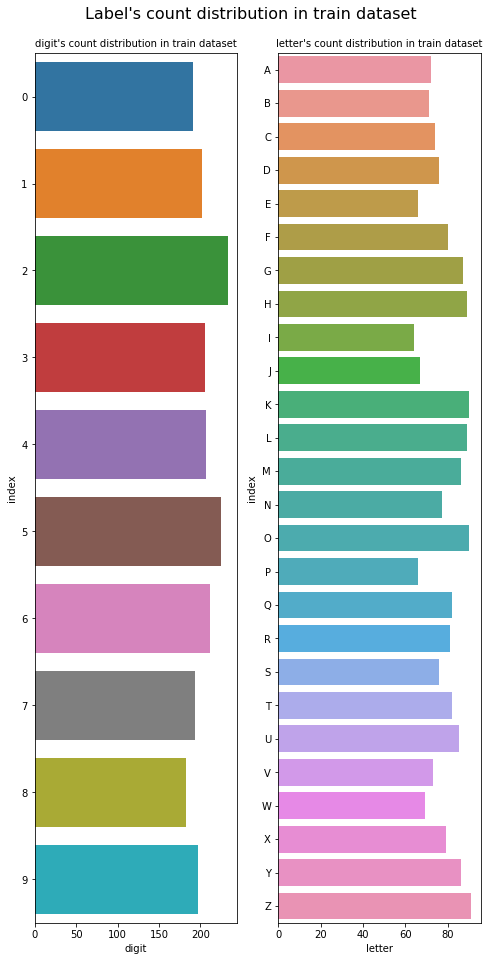

In [6]:
fig, axes = plt.subplots(figsize=[8,16],nrows=1,ncols=2)

target_cols = ["digit","letter"]

for idx, ax in enumerate(axes):

    column = target_cols[idx]
    dummy = df_train[column].value_counts().sort_index().reset_index()
    sns.barplot(data=dummy,x=column,y="index",orient='h',ax=ax,)

    ax.set_title(f"{column}'s count distribution in train dataset",fontsize=10)

plt.suptitle("Label's count distribution in train dataset",y=0.92,fontsize=16)

In [7]:
unq_letters = df_train.letter.value_counts().sort_index().index
idx_letter_dict = { idx:letter for idx, letter in enumerate(unq_letters) }
letter_idx_dict = { letter:idx for idx, letter in idx_letter_dict.items() }

In [8]:
df_train.loc[:,"letter"] = df_train.letter.apply(lambda x:letter_idx_dict[x])

Text(0.5,0.92,"Label's count distribution in train dataset")

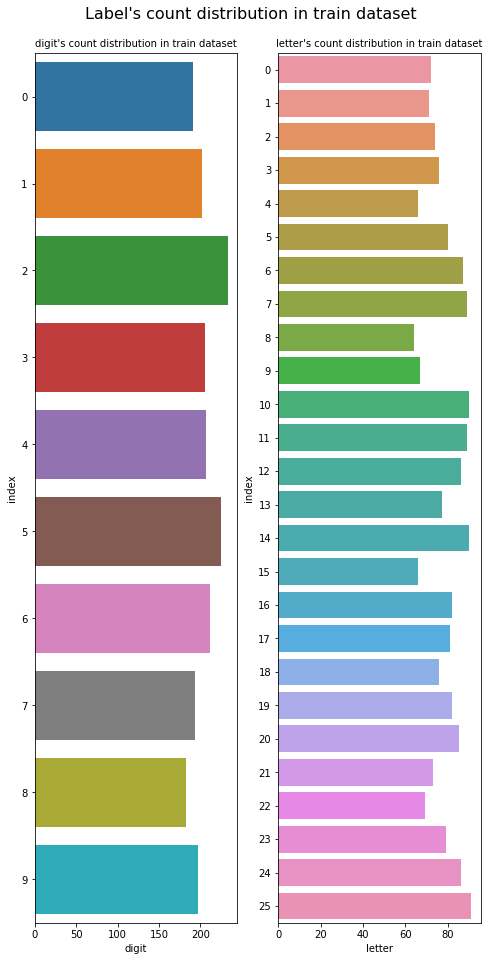

In [9]:
fig, axes = plt.subplots(figsize=[8,16],nrows=1,ncols=2)

target_cols = ["digit","letter"]

for idx, ax in enumerate(axes):

    column = target_cols[idx]
    dummy = df_train[column].value_counts().sort_index().reset_index()
    sns.barplot(data=dummy,x=column,y="index",orient='h',ax=ax,)

    ax.set_title(f"{column}'s count distribution in train dataset",fontsize=10)

plt.suptitle("Label's count distribution in train dataset",y=0.92,fontsize=16)

In [10]:
!pip install iterative-stratification

In [11]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

df_train_X = df_train["id"]
df_train_y = df_train[df_train.columns[1:3]]

multi_kfold = MultilabelStratifiedKFold(n_splits=5,random_state=0)

for idx,(train_idx,valid_idx) in enumerate(multi_kfold.split(df_train_X,df_train_y)):
    df_train.loc[valid_idx,"fold"] = int(idx)

In [12]:
df_train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,775,776,777,778,779,780,781,782,783,fold
0,1,5,11,1,1,1,4,3,0,0,...,1,0,1,2,4,4,4,3,4,4.0
1,2,0,1,0,4,0,0,4,1,1,...,3,0,1,4,1,4,2,1,2,0.0
2,3,4,11,1,1,2,2,1,1,1,...,3,3,0,2,0,3,0,2,2,3.0
3,4,9,3,1,2,0,2,0,4,0,...,3,2,0,1,4,0,0,1,1,1.0
4,5,6,0,3,0,2,4,0,3,0,...,4,3,2,1,3,4,3,1,2,0.0


427


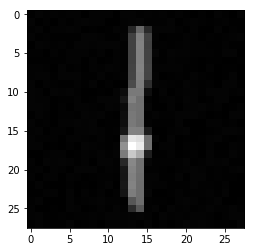

In [13]:
rand_num = np.random.randint(2048)
print(rand_num)
plt.imshow(df_train.loc[:,df_train.columns[3:-1]].iloc[rand_num].values.reshape(28,28),cmap="gray")

# 3. pytorch Dataset 생성

In [14]:
!pip install torch===1.6.0 torchvision===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [15]:
import torch

from torch.utils.data import Dataset

In [16]:
df_train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,775,776,777,778,779,780,781,782,783,fold
0,1,5,11,1,1,1,4,3,0,0,...,1,0,1,2,4,4,4,3,4,4.0
1,2,0,1,0,4,0,0,4,1,1,...,3,0,1,4,1,4,2,1,2,0.0
2,3,4,11,1,1,2,2,1,1,1,...,3,3,0,2,0,3,0,2,2,3.0
3,4,9,3,1,2,0,2,0,4,0,...,3,2,0,1,4,0,0,1,1,1.0
4,5,6,0,3,0,2,4,0,3,0,...,4,3,2,1,3,4,3,1,2,0.0


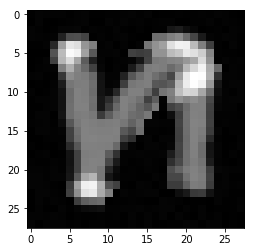

In [17]:
img_height = 28
img_width = 28

rand_num = np.random.randint(2048)
img = df_train.loc[:,df_train.columns[3:-1]].iloc[rand_num].values.reshape(img_height,img_width)
plt.imshow(img,cmap="gray")

In [18]:
class Emnst_Dataset(Dataset):
    def __init__(self, csv, img_height, img_width, transform):
        self.csv = csv.copy()
        self.ids = csv.loc[:,"id"].values
        self.digits = csv.loc[:,"digit"].values
        self.letters = csv.loc[:,"letter"].values
        self.img_height = img_height
        self.img_width = img_width
        self.transform = transform
    
    def __len__(self):
        return len(self.csv)
        
    def __getitem__(self, index):
        img_id = self.ids[index]
        img = df_train.loc[index, df_train.columns[3:-1]].values
        img = img.reshape(self.img_height, self.img_width)
        img = img.astype("uint8")
        img = img[:,:,np.newaxis]
        img = np.repeat(img,3,2)
        
        if self.transform is not None:
            img = self.transform(image=img)["image"]
        
        digit = self.digits[index]
        letter = self.letters[index]
        
#         return img, np.array([digit,letter])
        return img, np.array([torch.tensor(digit,dtype=torch.long), torch.tensor(letter,dtype=torch.long)])

In [19]:
!pip install albumentations
!pip install opencv-python

In [20]:
import albumentations as A
from albumentations.pytorch import ToTensor

train_transforms = A.Compose([
        A.Rotate(20),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    #pytorch가 학습에 사용할 수 있는 형태로 Image를 출력(HWC -> CHW)
    ToTensor()
    ])

valid_transforms = A.Compose([
    #pytorch가 학습에 사용할 수 있는 형태로 Image를 출력(HWC -> CHW)
    ToTensor()
    ])

In [21]:
train_dataset = Emnst_Dataset(csv=df_train,img_height=28,img_width=28, transform=train_transforms)

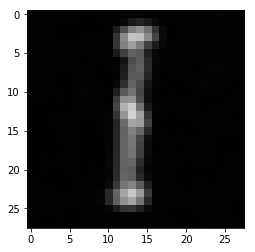

In [22]:
plt.imshow(train_dataset[0][0].permute(1,2,0),cmap="gray")

In [23]:
!pip install pretrainedmodels

In [24]:
import pretrainedmodels
model_name = 'resnet34'
backbone = pretrainedmodels.__dict__[model_name](pretrained='imagenet')

In [25]:
backbone

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [26]:
in_features = backbone.last_linear.in_features
in_features

512

In [27]:
import torch.nn as nn

In [28]:
backbone.last_linear = nn.Linear(in_features,36)
backbone

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
df_train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,775,776,777,778,779,780,781,782,783,fold
0,1,5,11,1,1,1,4,3,0,0,...,1,0,1,2,4,4,4,3,4,4.0
1,2,0,1,0,4,0,0,4,1,1,...,3,0,1,4,1,4,2,1,2,0.0
2,3,4,11,1,1,2,2,1,1,1,...,3,3,0,2,0,3,0,2,2,3.0
3,4,9,3,1,2,0,2,0,4,0,...,3,2,0,1,4,0,0,1,1,1.0
4,5,6,0,3,0,2,4,0,3,0,...,4,3,2,1,3,4,3,1,2,0.0


In [30]:
from torch.utils.data import Dataset, DataLoader

target_fold = 2.0
trn_idx = df_train.loc[df_train.fold==target_fold].index
val_idx = df_train.loc[df_train.fold!=target_fold].index

trn_dataset = Emnst_Dataset(csv=df_train.loc[trn_idx],
                                           img_height=28,
                                           img_width=28,
                                           transform=train_transforms)

val_dataset = Emnst_Dataset(csv=df_train.loc[val_idx],
                                           img_height=28,
                                           img_width=28,
                                           transform=valid_transforms)

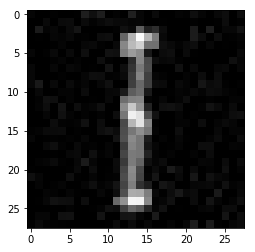

In [31]:
plt.imshow(trn_dataset[0][0].permute(1,2,0),cmap="gray")

In [32]:
trn_dataset[0][0].shape

torch.Size([3, 28, 28])

In [33]:
trn_loader = DataLoader(trn_dataset,
                                       shuffle=True,
                                       batch_size=256)

val_loader = DataLoader(val_dataset,
                                       shuffle=False,
                                       batch_size=256)

In [34]:
model = backbone

In [35]:
model.parameters()

<generator object Module.parameters at 0x00000178B2D43B88>

In [36]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [37]:
loss_fn = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max",verbose=True,patience=7,factor=0.5)

In [38]:
from tqdm import tqdm_notebook

In [39]:
from sklearn.metrics import recall_score

best_score = 0

for e in tqdm_notebook(range(10)):
    trn_loss = []
    model.train()
    
    for inputs, targets in tqdm_notebook(trn_loader):
        logits = model(inputs)

        digit = logits[:,:10]
        letter = logits[:,10:]

        loss = loss_fn(digit,targets[:,0]) + loss_fn(letter,targets[:,1])

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        trn_loss.append(loss.item())

    val_loss = []
    val_true = []
    val_pred = []

    model.eval()

    with torch.no_grad():
        for inputs, targets in tqdm_notebook(val_loader):
            logits = model(inputs)

            digit = logits[:,:10]
            letter = logits[:,10:]

            loss = loss_fn(digit,targets[:,0]) + loss_fn(letter,targets[:,1])

            val_loss.append(loss.item())

            digit = digit.argmax(dim=1).data.numpy()
            letter = letter.argmax(dim=1).data.numpy()

#             val_true.append(targets.numpy())
            val_true.append(targets.data.numpy())
            val_pred.append(np.stack([digit, letter],axis=1))

    valid_loss = np.mean(val_loss)
    train_loss = np.mean(trn_loss)

    score_d = recall_score(val_true[-1][:,0],val_pred[-1][:,0],average="macro") 
    score_l = recall_score(val_true[-1][:,1],val_pred[-1][:,1],average="macro")

    final_score = np.average([score_d,score_l],weights=[1,1])

    print(f"train_loss: {train_loss: .5f}; valid_loss: {valid_loss: .5f}; score: {final_score: .5f}")
    print(f"score_d: {score_d: .5f}; score_l:{score_l: .5f}")

    if final_score > best_score:
        best_score = final_score
        state_dict = model.state_dict()
        model = model
        torch.save(state_dict,"model.pt")

tensor(6.7854)
tensor(6.8905)
tensor(6.8942)
tensor(6.9417)
tensor(6.9929)
tensor(7.1752)
tensor(6.9967)
train_loss:  6.11440; valid_loss:  6.95380; score:  0.04840
score_d:  0.08141; score_l: 0.01538


tensor(6.6337)
tensor(6.7194)
tensor(6.5531)
tensor(6.7186)
tensor(6.8045)
tensor(6.7882)
tensor(6.7574)
train_loss:  5.57521; valid_loss:  6.71070; score:  0.07660
score_d:  0.10449; score_l: 0.04872


tensor(5.9448)
tensor(5.8776)
tensor(5.8707)
tensor(5.9373)
tensor(5.9499)
tensor(5.9198)
tensor(5.9215)
train_loss:  5.51669; valid_loss:  5.91737; score:  0.06160
score_d:  0.09756; score_l: 0.02564


tensor(5.7005)
tensor(5.6134)
tensor(5.6837)
tensor(5.6459)
tensor(5.6716)
tensor(5.6620)
tensor(5.6596)
train_loss:  5.44738; valid_loss:  5.66238; score:  0.07788
score_d:  0.12372; score_l: 0.03205


tensor(5.6853)
tensor(5.6152)
tensor(5.6601)
tensor(5.6363)
tensor(5.6374)
tensor(5.6637)
tensor(5.6387)
train_loss:  5.42750; valid_loss:  5.64810; score:  0.08731
score_d:  0.11500; score_l: 0.05962


tensor(5.7128)
tensor(5.6560)
tensor(5.6929)
tensor(5.6753)
tensor(5.6723)
tensor(5.7081)
tensor(5.6791)
train_loss:  5.28638; valid_loss:  5.68521; score:  0.06936
score_d:  0.11372; score_l: 0.02500


tensor(5.7286)
tensor(5.6817)
tensor(5.7076)
tensor(5.6924)
tensor(5.6975)
tensor(5.7343)
tensor(5.6971)
train_loss:  5.12934; valid_loss:  5.70562; score:  0.04731
score_d:  0.07538; score_l: 0.01923


tensor(5.7593)
tensor(5.7059)
tensor(5.7351)
tensor(5.7187)
tensor(5.7148)
tensor(5.7810)
tensor(5.7196)
train_loss:  4.98407; valid_loss:  5.73350; score:  0.05673
score_d:  0.08846; score_l: 0.02500


tensor(5.7367)
tensor(5.6648)
tensor(5.6918)
tensor(5.7059)
tensor(5.6870)
tensor(5.7556)
tensor(5.6911)
train_loss:  4.93876; valid_loss:  5.70471; score:  0.05609
score_d:  0.09679; score_l: 0.01538


tensor(5.7386)
tensor(5.6394)
tensor(5.6886)
tensor(5.7079)
tensor(5.6865)
tensor(5.7424)
tensor(5.7080)
train_loss:  4.78556; valid_loss:  5.70162; score:  0.08276
score_d:  0.10910; score_l: 0.05641



In [43]:
model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>